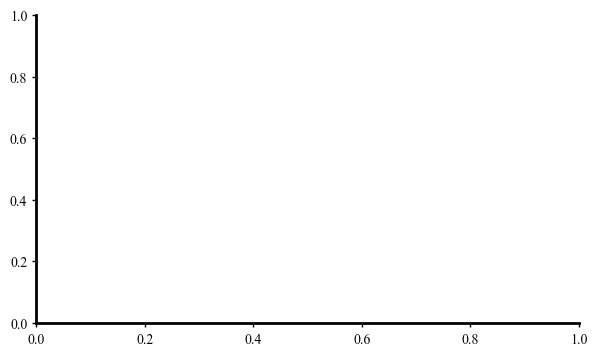

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from plotparams import init_plotting
from matplotlib import patheffects
init_plotting()

In [2]:
plt.rcParams['font.size'] = 16
LSIZE = 15

In [3]:
with open("splits_10_text_llama_flava.pkl", "rb") as f:
    splitdata = pkl.load(f)

In [5]:
# get average of liked_acc and disliked_acc for all users for each split for each model for each gender

def get_avg_usr_stats(splitdata):
    

    data = {}
    models = list(splitdata.keys())
    for model in models:
        data[model] = {}
        splitlist = splitdata[model].keys()
        for split in splitlist:
            data[model][split] = {}

    for model in models:
        # liked_acc = []
        # disliked_acc = []
        # liked_var = []
        # disliked_var = []
        
        for split in list(splitdata[model].keys()):
            # print(split)
            # for gender in list(data[model][split].keys()):
            for gender in ["Man", "Woman"]:
                # print(gender)
                data[model][split][gender] = {"liked_acc": [], "disliked_acc": [],
                                    "liked_var": [], "disliked_var": []}
                usr_liked_acc = []
                usr_disliked_acc = []
                usr_liked_var = []
                usr_disliked_var = []

                for user in list(splitdata[model][split][gender].keys()):
                    usrdata = splitdata[model][split][gender][user]
                    usr_liked_acc.append(usrdata["liked_acc"])
                    usr_disliked_acc.append(usrdata["disliked_acc"])
                    usr_liked_var.append(usrdata["liked_var"])
                    usr_disliked_var.append(usrdata["disliked_var"])

                data[model][split][gender]["liked_acc"] = np.mean(usr_liked_acc)
                data[model][split][gender]["disliked_acc"] = np.mean(usr_disliked_acc)
                data[model][split][gender]["liked_var"] = np.mean(usr_liked_var)
                data[model][split][gender]["disliked_var"] = np.mean(usr_disliked_var)

    return data

splitdata_avg = get_avg_usr_stats(splitdata)

In [6]:
splitdata_avg['flava'][0.1]['Man']

{'liked_acc': 0.21943921158206875,
 'disliked_acc': 0.2117687074829932,
 'liked_var': 0.005906506524332596,
 'disliked_var': 0.0035890436597919594}

In [17]:
def plot_models_avgstats(splitdata_avg, gender="Man" ,save=False):
    """
    Plots accuracy and error bars for all specified models in subplots.

    Parameters:
        splitdata: dict - The data structure containing split information.
        usridx: int - The user index to extract data for.
        models: list - List of model names to plot.
        gender: str - The gender of the user.
        save: bool - Whether to save the plot to a file.
    """
    # Determine the layout of subplots
    models = list(splitdata_avg.keys())
    n_models = len(models)
    n_cols = 3  # Define how many subplots per row
    n_rows = (n_models + n_cols - 1) // n_cols  # Calculate rows based on number of models

    # Create figure and axes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes to iterate easily

    for idx, model in enumerate(models):
        liked_acc_split = []
        disliked_acc_split = []
        liked_var_split = []
        disliked_var_split = []

        modeldata = splitdata_avg[model]
        splits = list(modeldata.keys())

        for split in splits:
            usrdata = (modeldata[split][gender])
            # print(usrdata)
            liked_acc_split.append(usrdata["liked_acc"])
            disliked_acc_split.append(usrdata["disliked_acc"])
            liked_var_split.append(usrdata["liked_var"])
            disliked_var_split.append(usrdata["disliked_var"])

        lv = np.sqrt(liked_var_split)
        dv = np.sqrt(disliked_var_split)
        # lv = (liked_var_split)
        # dv = (disliked_var_split)

        # Plot on the corresponding subplot
        ax = axes[idx]
        ax.plot(splits, liked_acc_split, color='orange', label='liked (mean)')
        ax.plot(splits, disliked_acc_split, color='#1f77b4', label='disliked (mean)')
        ax.errorbar(splits, liked_acc_split, yerr=lv, fmt='o', capsize=6, ecolor='#D2B48C',
                    mfc='orange', mec='white', label='liked (std)')
        ax.errorbar(splits, disliked_acc_split, yerr=dv, fmt='o', capsize=6, ecolor='darkgray',
                    mfc='#1f77b4', mec='white', label='disliked (std)')

        ax.set_xlabel("split")
        ax.set_ylabel("accuracy")
        ax.set_title(f"{model} | {str(gender).lower()}")
        ax.legend(prop={'size': LSIZE})
        ax.grid(True)

    # Remove unused axes (if models < n_rows * n_cols)
    for ax in axes[len(models):]:
        ax.axis('off')

    # Adjust layout and optionally save
    plt.tight_layout()
    if save:
        plt.savefig(f"./train_splits_{gender}.pdf")
    plt.show()


In [ ]:
def plot(splitdata, usridx, model, gender='Man', save=False):
    liked_acc_split = []
    disliked_acc_split = []
    liked_var_split = []
    disliked_var_split = []
    modeldata = splitdata[model]
    splits = list(modeldata.keys())
    for split in splits:
        # print(split)
        usrdata = (modeldata[split][gender][usridx])
        liked_acc_split.append(usrdata["liked_acc"])
        disliked_acc_split.append(usrdata["disliked_acc"])
        liked_var_split.append(usrdata["liked_var"])
        disliked_var_split.append(usrdata["disliked_var"])

    lv = np.sqrt(liked_var_split)
    dv = np.sqrt(disliked_var_split)
    plt.plot(splits, liked_acc_split, color='orange')
    plt.plot(splits, disliked_acc_split, color='#1f77b4')
    plt.errorbar(splits, liked_acc_split, yerr=lv, fmt='o', capsize=6, ecolor='dimgray',
                 mfc='orange' ,mec='white', label='liked')
    plt.errorbar(splits, disliked_acc_split, yerr=dv, fmt='o', capsize=6, ecolor='darkgray',
                 mfc='#1f77b4',mec='white', label='disliked')	

    # plt.legend(["liked", 'disliked'])
    plt.legend()
    plt.xlabel("split")
    plt.ylabel("accuracy")
    title = f"training {model} | user{usridx} | {gender}"
    plt.title(title)
    if(save):
        plt.savefig(f"./modeluser_data/trainsplit_{model}_user{usridx}_{gender}"+'.pdf')
    plt.show()
    



In [ ]:
for u in range(len(splitdata['meta-llama-3-8B'][0.1]['Man'])):
    print(u)    
    plot(splitdata, u, 'meta-llama-3-8B', save=True, gender='Man')
    plot(splitdata, u, 'meta-llama-3-8B', save=True, gender='Woman')

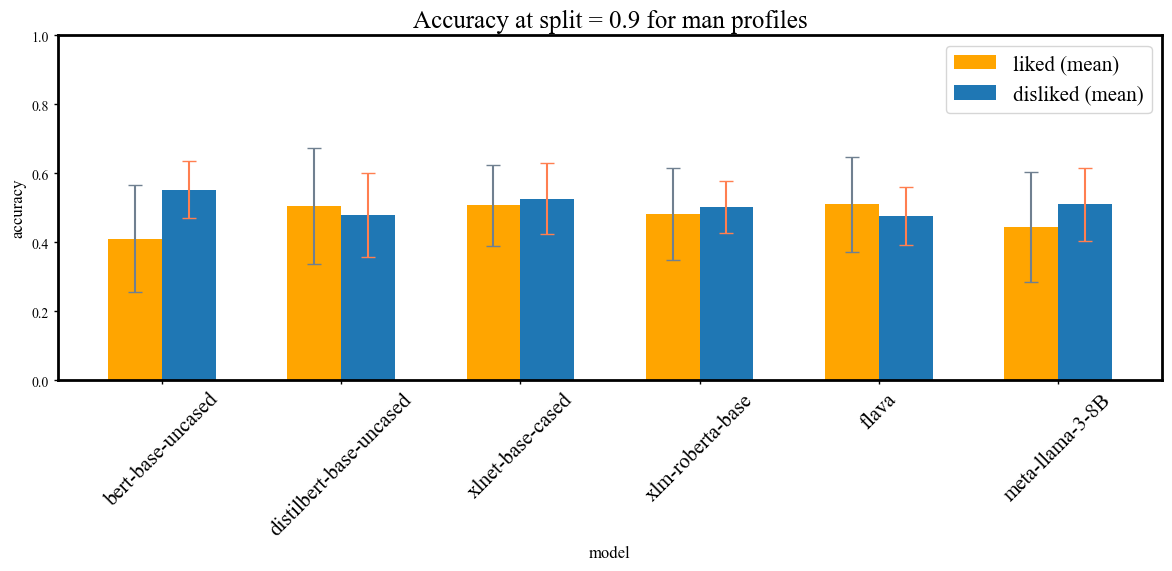

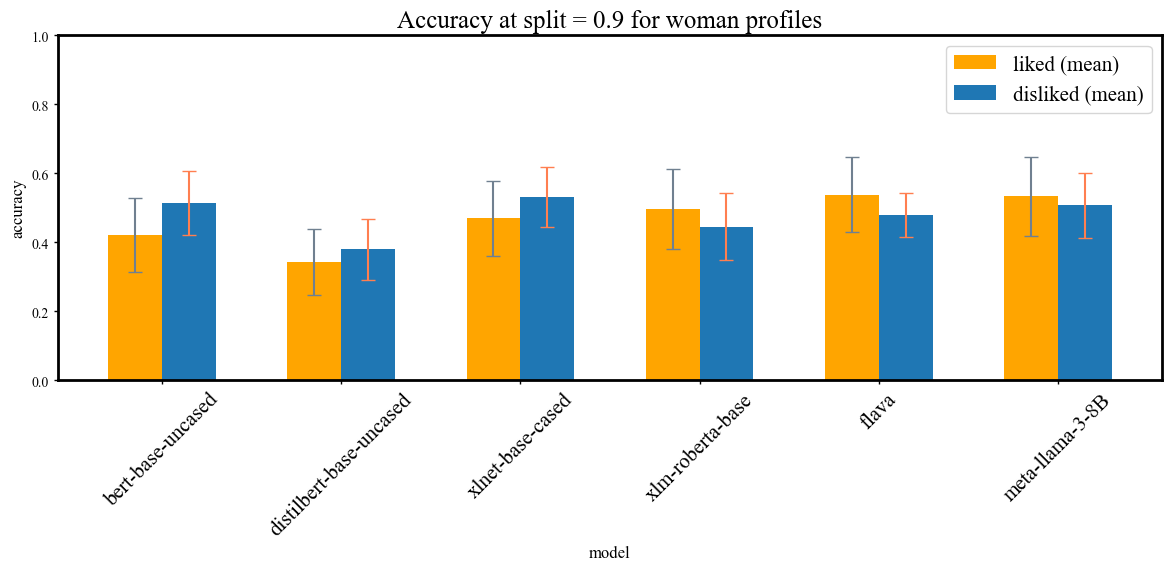

In [50]:
import matplotlib.colors as mcolors

def darken_color(color, factor=1):
    """
    Darkens the given color by multiplying (1-factor) to its RGB values.
    :param color: Color name or hex code (e.g., 'orange' or '#1f77b4')
    :param factor: Factor by which to darken the color (0 means no change, 1 means black)
    :return: Darkened color as a hex code
    """
    rgb = mcolors.to_rgb(color)  # Convert color to RGB
    dark_rgb = [c * factor for c in rgb]  # Apply the darkening factor
    return mcolors.to_hex(dark_rgb)  # Convert back to hex

# Original colors
orange = 'orange'
blue = '#1f77b4'

# Darkened colors
dark_orange = darken_color(orange)
dark_blue = darken_color(blue)

def plot_models_avgstats_bar(splitdata_avg, gender="Man", liked=True, save=False):
    """
    Plots accuracy and error bars for all specified models in subplots.

    Parameters:
        splitdata: dict - The data structure containing split information.
        usridx: int - The user index to extract data for.
        models: list - List of model names to plot.
        gender: str - The gender of the user.
        save: bool - Whether to save the plot to a file.
    """
    # Determine the layout of subplots
    models = list(splitdata_avg.keys())
    n_models = len(models)
    # n_cols = 3  # Define how many subplots per row
    # n_rows = (n_models + n_cols - 1) // n_cols  # Calculate rows based on number of models

    # Create figure and axes
    # fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
    # axes = axes.flatten()  # Flatten the 2D array of axes to iterate easily

    fig = plt.figure(figsize=(12, 6))
    plt.xlabel("model")
    # plt.xticks(models, rotation=45)
    plt.ylabel("accuracy")
    xrange = np.arange(0, len(models))
    liked_accs = []
    disliked_accs = []
    liked_vars = []
    disliked_vars = []


    for idx, model in enumerate(models):
        modeldata = splitdata_avg[model][0.9][gender]
        liked_accs.append(modeldata["liked_acc"])
        disliked_accs.append(modeldata["disliked_acc"])
        liked_vars.append(modeldata["liked_var"])
        disliked_vars.append(modeldata["disliked_var"]) 

    # Plot on the corresponding subplot
    # ax = axes[idx]
    # ax.plot(splits, liked_acc_split, color='orange', label='liked (mean)')
    # ax.plot(splits, disliked_acc_split, color='#1f77b4', label='disliked (mean)')
    # ax.errorbar(splits, liked_acc_split, yerr=lv, fmt='o', capsize=6, ecolor='#D2B48C',
    #             mfc='orange', mec='white', label='liked (std)')
    # ax.errorbar(splits, disliked_acc_split, yerr=dv, fmt='o', capsize=6, ecolor='darkgray',
    #             mfc='#1f77b4', mec='white', label='disliked (std)')

    bwid = 0.3
    plt.bar(xrange-bwid/2, liked_accs, yerr=liked_vars, color=orange, alpha=1, width=bwid,
             label='liked (mean)',  capsize=5, ecolor='#708090')
    plt.bar(xrange+bwid/2, disliked_accs, yerr=disliked_vars, color=blue, alpha=1, width=bwid,
             label='disliked (mean)',  capsize=5, ecolor='#FF7F50')

    # plt.errorbar(xrange, liked_vars, color=dark_orange, alpha=1, linewidth=2, label='liked (var)')
    # plt.errorbar(xrange, disliked_vars, color=dark_blue, alpha=1, linewidth=2, label='disliked (var)')

    plt.xticks(xrange, models, rotation=45, fontsize=LSIZE)
    plt.ylim(0, 1)
    plt.title(f"Accuracy at split = 0.9 for {gender.lower()} profiles")
    plt.legend(fontsize=LSIZE)
    plt.tight_layout()
    if save:
        plt.savefig(f"./split_9_allmodels_{gender.lower()}.pdf")
    plt.show()
        
save = True
plot_models_avgstats_bar(splitdata_avg, save=save)
plot_models_avgstats_bar(splitdata_avg, save=save, gender="Woman")

In [35]:
# plot_models_avgstats(splitdata_avg,gender='Man', save=True)
# plot_models_avgstats(splitdata_avg,gender='Woman', save=True)
# plot_models_avgstats_bar(splitdata_avg, save=False, liked=True)
# plot_models_avgstats_bar(splitdata_avg, save=False, liked=False)